# Sales Analysis

import libraries

In [32]:
import pandas as pd
import numpy as np
import os

In [59]:
pd.options.display.float_format = '{:,.2f}'.format

get files names using os.listdir

In [23]:
files = [file for file in os.listdir("./Sales_Data")]
#print(files)

#### Importing Files

Reading each file individually and then concatenete them into a single DataFrame

In [42]:
paths = []
for m in files:
    paths.append(f"./Sales_Data/{m}")
    
df = pd.concat(map(pd.read_csv, paths))
df.shape

(186850, 6)

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales? How much was earned that month?

In [44]:
df = df.drop(df[df['Order Date'] == 'Order Date'].index)
df.dropna(inplace=True)
df.shape

(182735, 6)

In [53]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [54]:
df['Total'] = df['Quantity Ordered']*df['Price Each']

In [60]:
monthly = df.groupby(df['Order Date'].dt.month)['Total'].sum()
monthly

Order Date
1    1,786,511.29
2    2,158,127.48
3    2,755,969.40
4    3,336,376.42
5    3,101,881.04
6    2,524,464.99
7    2,587,444.91
8    2,191,698.31
9    2,050,361.26
10   3,679,254.16
11   3,149,785.09
12   4,557,905.42
Name: Total, dtype: float64

<AxesSubplot:xlabel='Order Date'>

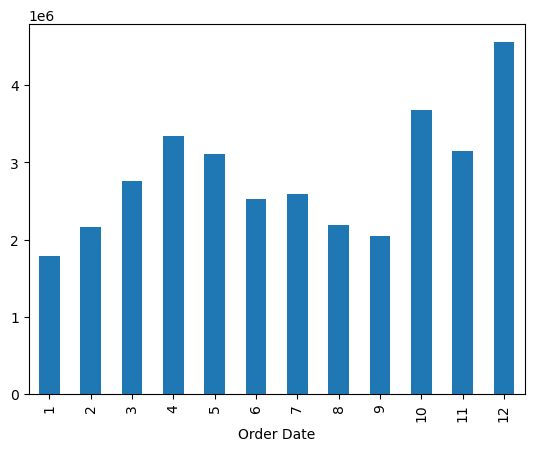

In [57]:
monthly.plot.bar()

### What city has the greates number of sales?

In [65]:
df['Purchase Address'] = df['Purchase Address'].astype('|S') #convert the object type into string

In [ ]:
ooeojdaifjaefafjo